<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:

Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/bai5/', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 349 images belonging to 10 classes.


{'AnhViet': 0,
 'BaoNha': 1,
 'ChiNhan': 2,
 'DuyChinh': 3,
 'NgocQuy': 4,
 'QuocPhong': 5,
 'SonLam': 6,
 'ThienPhat': 7,
 'TrungQuan': 8,
 'TuanNam': 9}

In [ ]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
11/11 [==============================] - 65s 5s/step - loss: 11.2918 - accuracy: 0.1777
Epoch 2/50
11/11 [==============================] - 62s 6s/step - loss: 0.6761 - accuracy: 0.8338
Epoch 3/50
11/11 [==============================] - 63s 6s/step - loss: 0.1485 - accuracy: 0.9742
Epoch 4/50
11/11 [==============================] - 61s 6s/step - loss: 0.1321 - accuracy: 0.9656
Epoch 5/50
11/11 [==============================] - 64s 6s/step - loss: 0.0806 - accuracy: 0.9799
Epoch 6/50
11/11 [==============================] - 62s 6s/step - loss: 0.0472 - accuracy: 0.9885
Epoch 7/50
11/11 [==============================] - 63s 6s/step - loss: 0.0536 - accuracy: 0.9771
Epoch 8/50
11/11 [==============================] - 61s 6s/step - loss: 0.0384 - accuracy: 0.9885
Epoch 9/50
11/11 [==============================] - 62s 6s/step - loss: 0.0930 - accuracy: 0.9799
Epoch 10/50
11/11 [==============================] - 62s 6s/step - loss: 0.0284 - accuracy: 0.9943
Epoch 11/50
11/11 

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  1.4925226423656568e-05
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


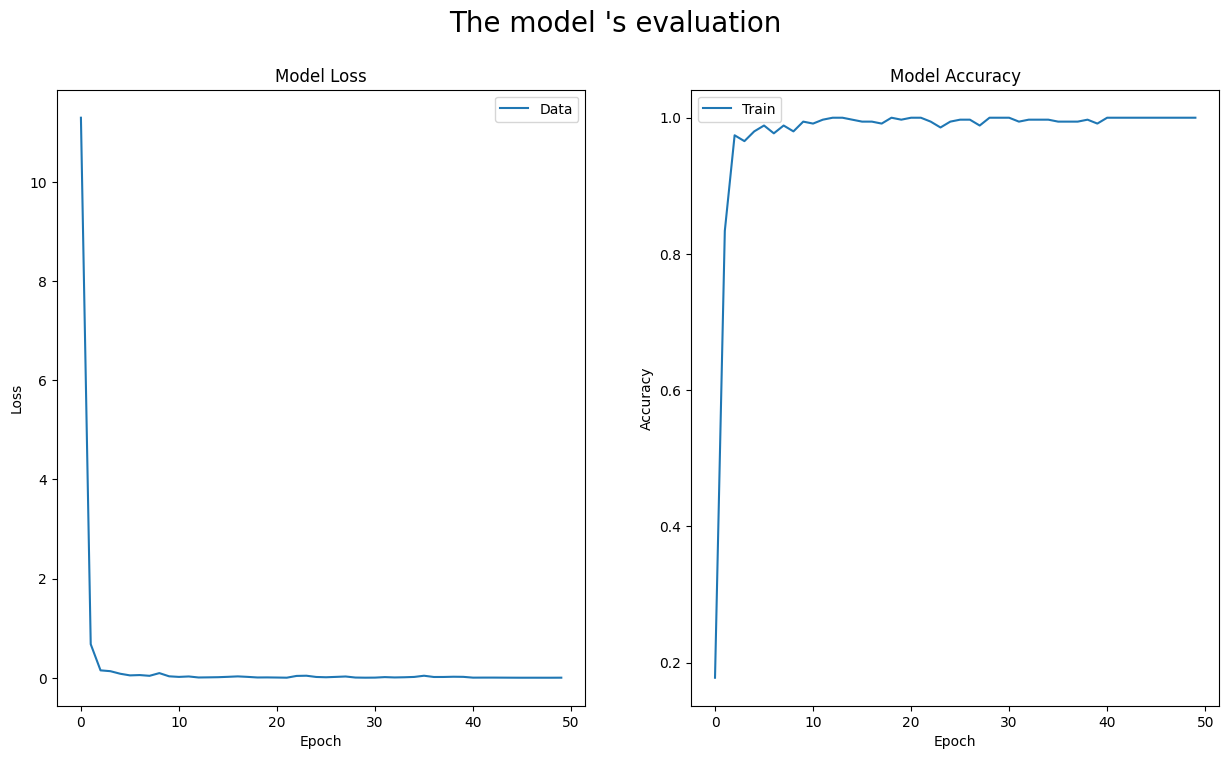

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Saved_Train/bai5.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Saved_Train/bai5.h5')

1/1 [==============================] - 0s 134ms/step
Đây là  : QuocPhong


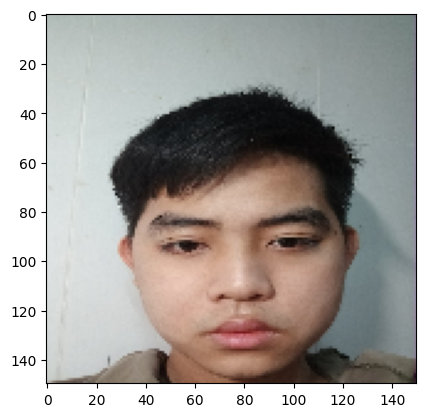

1/1 [==============================] - 0s 44ms/step
Đây là  : NgocQuy


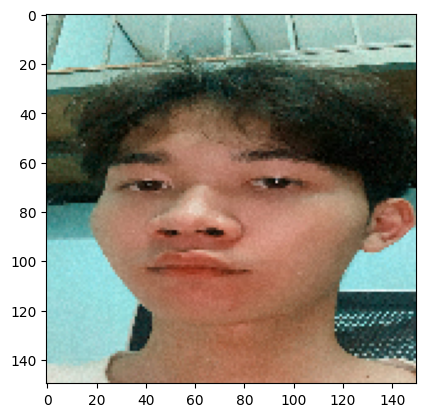

1/1 [==============================] - 0s 36ms/step
Đây là  : ChiNhan


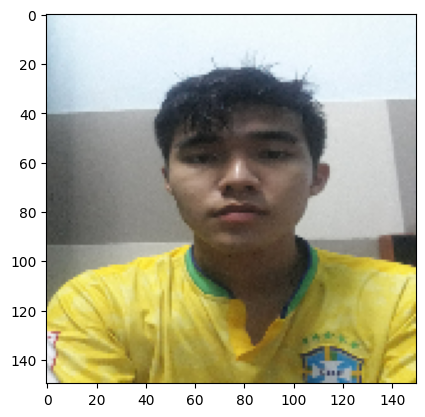

1/1 [==============================] - 0s 31ms/step
Đây là  : ThienPhat


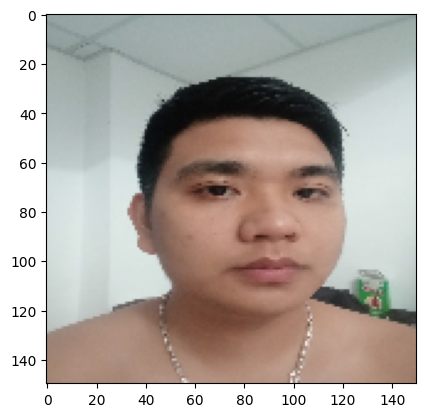

1/1 [==============================] - 0s 36ms/step
Đây là  : BaoNha


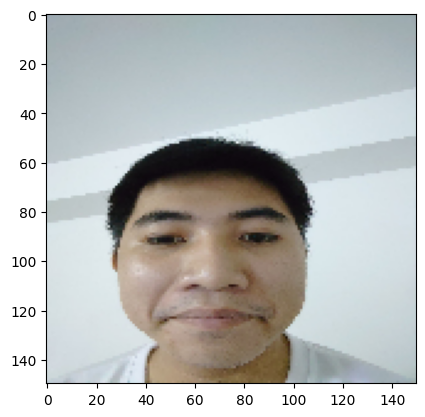

1/1 [==============================] - 0s 31ms/step
Đây là  : DuyChinh


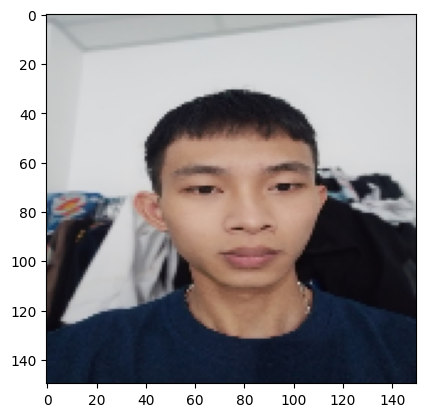

1/1 [==============================] - 0s 32ms/step
Đây là  : TuanNam


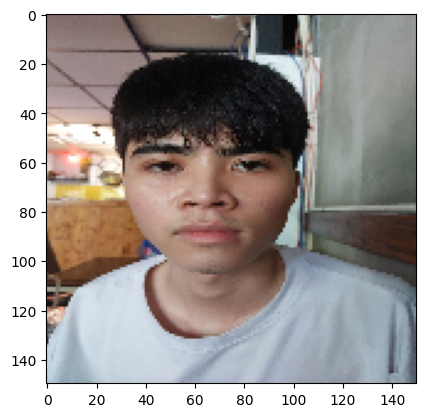

1/1 [==============================] - 0s 22ms/step
Đây là  : SonLam


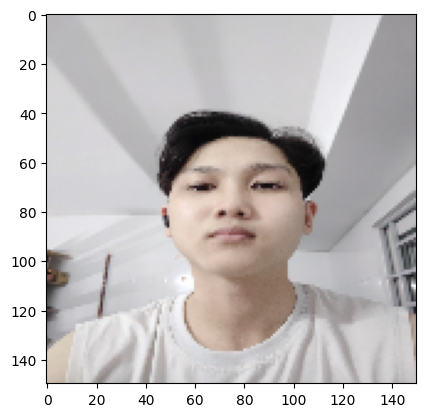

1/1 [==============================] - 0s 21ms/step
Đây là  : AnhViet


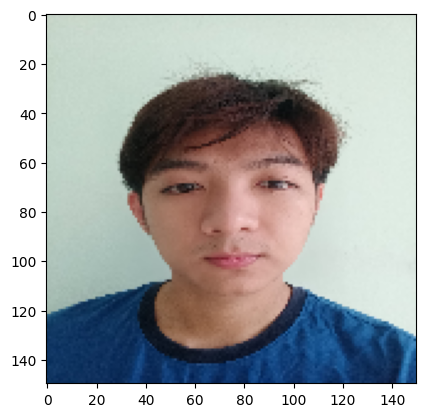

1/1 [==============================] - 0s 22ms/step
Đây là  : TrungQuan


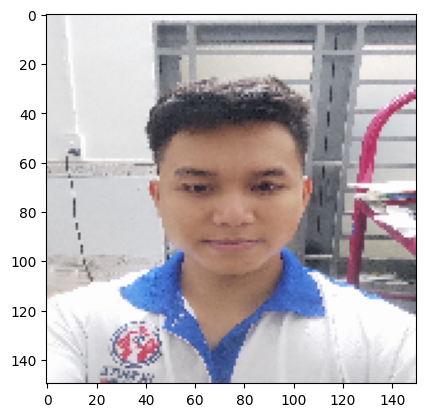

In [ ]:
folder='/content/drive/MyDrive/test5/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['AnhViet', 'BaoNha', 'ChiNhan', 'DuyChinh', 'NgocQuy', 'QuocPhong', 'SonLam', 'ThienPhat', 'TrungQuan', 'TuanNam']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()